# Exploring the *Titanic* dataset with `seaborn`

<div style="width:100%; text-align:center">
<img src=titanic.jpg width=500px>
</div>

Kaggle has a nice [dataset](https://www.kaggle.com/c/titanic-gettingStarted) with information about passengers on the *Titanic*. It's meant as an introduction to predictive models -- here, predicting who survived the sinking. Let's explore it using [seaborn](http://stanford.edu/~mwaskom/software/seaborn/).

<h2>What we learn</h2>

- Data Analysis from Kaggle
- Regression 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set(style="white")

First we load in the data and take a look

In [2]:
url = "train.csv"
titanic = pd.read_csv(url)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)

In [8]:
titanic.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


Let's do  little bit of processing to make some different variables that might be more interesting to plot. Since this notebook is focused on visualization, we're going to do this without much comment.

<b>Classification</b>

- sex + age -- "child (age<16)", "woman", "man"

In [11]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

<b> Others</b>

- class -- "First (1)", "Second (2)", " Third (3)"
- deck  -- "NaN", "C"
- embark_town -- "C (Cherbourg)", "Q (Queenstown)", "S (Southampton)"
- alive -- "yes (1)", "no (0)"
- alone (parch + sibsp &lt;2) -- "yes", "no"
- name,ticker,cabin removed

In [12]:
titanic["class"] = titanic.pclass.map({1: "First", 2: "Second", 3: "Third"})
titanic["who"] = titanic[["age", "sex"]].apply(woman_child_or_man, axis=1)
titanic["adult_male"] = titanic.who == "man"
titanic["deck"] = titanic.cabin.str[0].map(lambda s: np.nan if s == "T" else s)
titanic["embark_town"] = titanic.embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
titanic["alive"] = titanic.survived.map({0: "no", 1: "yes"})
titanic["alone"] = ~(titanic.parch + titanic.sibsp).astype(bool)
titanic = titanic.drop(["name", "ticket", "cabin"], axis=1)

In [13]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Finally set up a palette dictionary for some of the plots.

In [14]:
pal = dict(man="#4682B4", woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")

## Who were the *Titanic* passengers?

Before getting to the main question (who survived), let's take a look at the dataset to get a sense for how the observations are distributed into the different levels of our factors of interest.

### How many men, women, and children are in our sample?

First let's count the number of males and females, ignoring age.

- xtick: sex (man, woman)

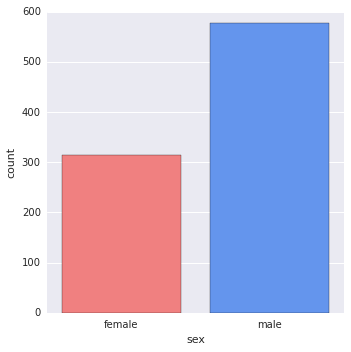

In [15]:
sns.factorplot("sex", data=titanic, palette=pal);

Then we can look at how this is distributed into the three classes.

- xtick: class (First, Second, Third) hued by sex (man, woman)

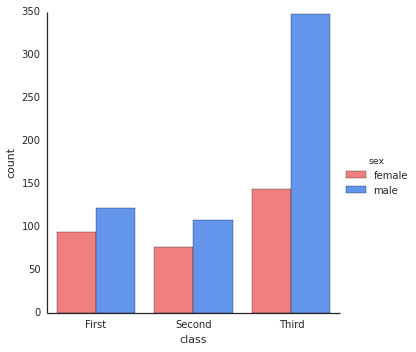

In [13]:
sns.factorplot("class", data=titanic, hue="sex", palette=pal);

We also have a separate classification that splits off children (recall, this is going to be relevant because of the "women and children first" policy followed during the evacuation).

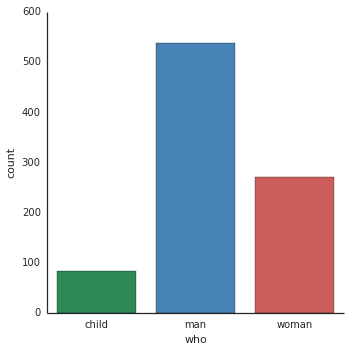

In [14]:
sns.factorplot("who", data=titanic, palette=pal);

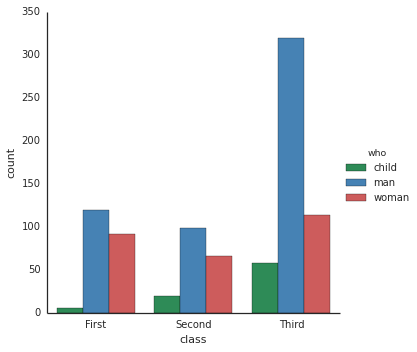

In [15]:
sns.factorplot("class", data=titanic, hue="who", palette=pal);

Finally, we made a variable that indicates whether a passanger was an adult male.

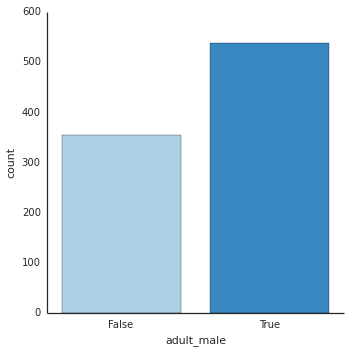

In [16]:
sns.factorplot("adult_male", data=titanic, palette="Blues");

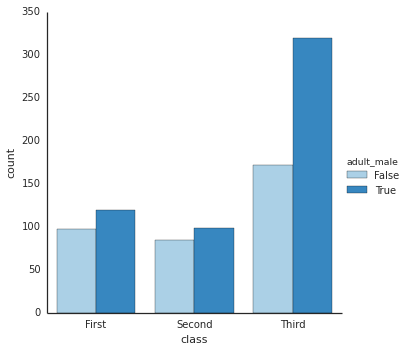

In [17]:
sns.factorplot("class", data=titanic, hue="adult_male", palette="Blues");

Next let's look at the distribution of ages within the groups we defined above.


- sns.kdeplot(): Fit and plot a univariate or bivarate kernel density estimate.
  - esitimate sex.[man, woman] kernel density function with respect to age;
  - esitimate who.[child, man, woman] kernel density function with respect to age.
 

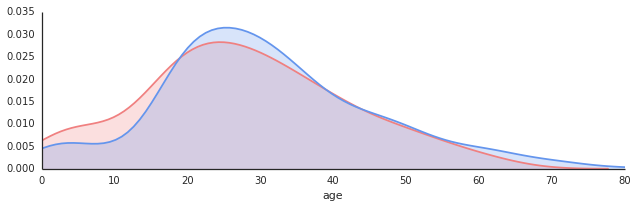

In [18]:
fg = sns.FacetGrid(titanic, hue="sex", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

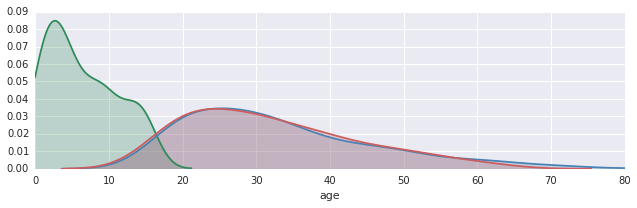

In [23]:
fg = sns.FacetGrid(titanic, hue="who", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

### How many first, second, and third class passengers are in our sample?

Although have some information about the distribution into classes from the sex plots, let's directly visualize it an then see how the classes break down by age.

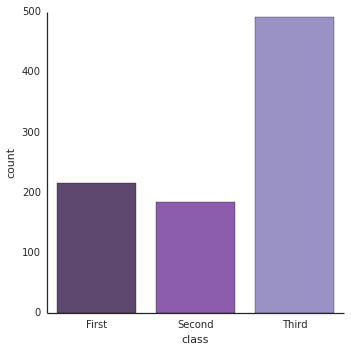

In [20]:
sns.factorplot("class", data=titanic, palette="BuPu_d");

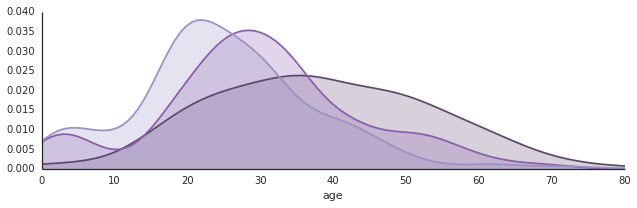

In [21]:
fg = sns.FacetGrid(titanic, hue="class", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

Finally let's look at the breakdown by age and sex.

- sns.rugplot(): Plot datapoints in an array as sticks on an axis.
- sns.despine(): Remove the top and right spines from plot(s)

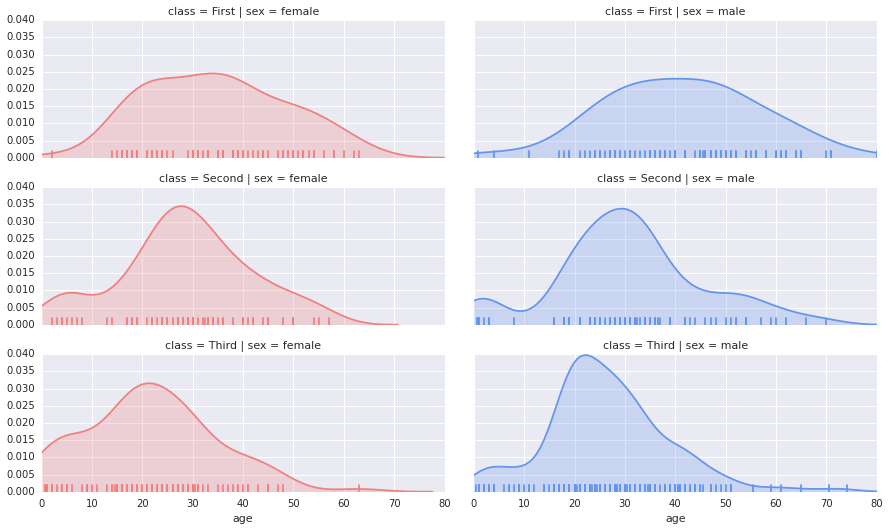

In [35]:
fg = sns.FacetGrid(titanic, col="sex", row="class", hue="sex", size=2.5, aspect=2.5, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.map(sns.rugplot, "age")
sns.despine(left=True)
fg.set(xlim=(0, 80));

### Where were our passenger's cabins?

We also have information about what deck each passgener's cabin was on, which may be relevant.

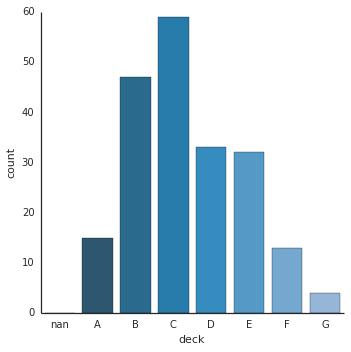

In [23]:
sns.factorplot("deck", data=titanic, palette="PuBu_d");

How did the decks break down by class for the passengers we have data about?

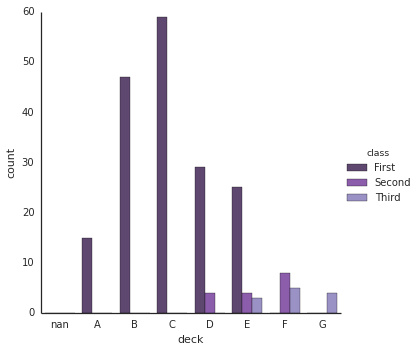

In [24]:
sns.factorplot("deck", hue="class", data=titanic, palette="BuPu_d");

Note that we're missing a lot of deck data for the second and third class passengers, which will be important to keep in mind later.

### How much did they pay for their tickets?

Since we have data about fares, let's see how those broke down by classes.

In [36]:
from seaborn import linearmodels
reload(linearmodels)
reload(sns)
sns.set(style="whitegrid")

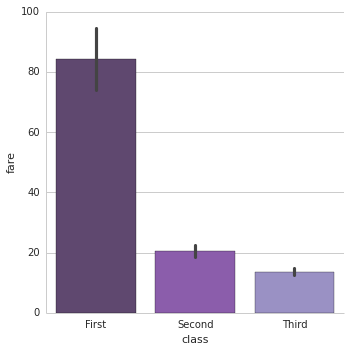

In [27]:
sns.factorplot("class", "fare", data=titanic, palette="BuPu_d");

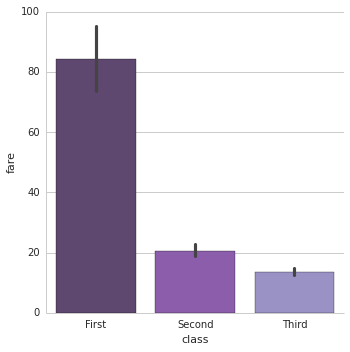

In [42]:
sns.factorplot( "class", "fare",data=titanic, palette="BuPu_d");

violinplot(): create a violin plot (a combination of boxplot and kernel density plot)

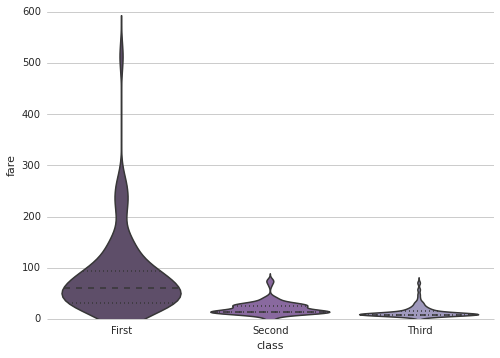

In [28]:
sns.violinplot(titanic["fare"], titanic["class"], color="BuPu_d").set_ylim(0, 600)
sns.despine(left=True);

There are some extreme outliers in the first class distribution; let's winsorize those to get a better sense for how much each class paid.

In [29]:
titanic["fare_winsor"] = titanic.fare.map(lambda f: min(f, 200))

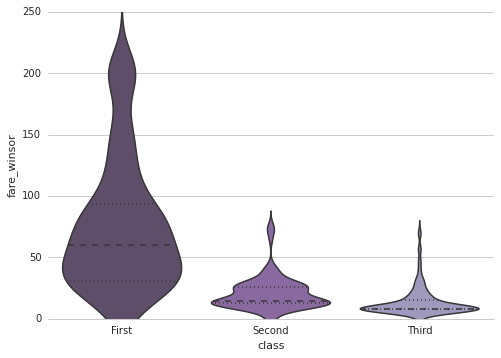

In [30]:
sns.violinplot(titanic["fare_winsor"], titanic["class"], color="BuPu_d").set_ylim(0, 250)
sns.despine(left=True);

How did the fares break down by deck? Let's look both at the mean and the distribution.

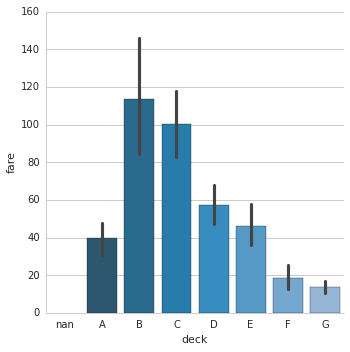

In [31]:
sns.factorplot("deck", "fare", data=titanic, palette="PuBu_d");

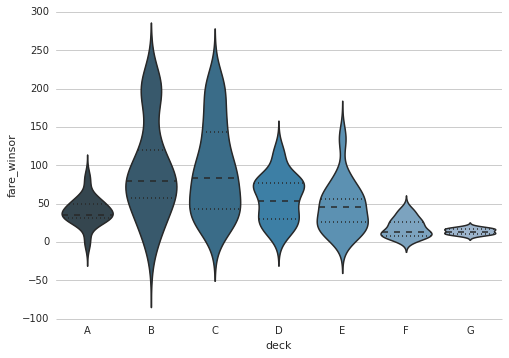

In [32]:
sns.violinplot(titanic["fare_winsor"], titanic["deck"], color="PuBu_d")
sns.despine(left=True);

It might make more sense to plot the median fare, since the distributions aren't normal.

/Users/cchcch/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:55: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


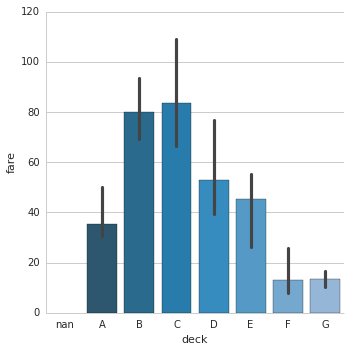

In [46]:
sns.factorplot("deck", "fare", data=titanic, palette="PuBu_d", estimator=np.median);

We can also look at a regression of fare on age to see if older passengers paid more. We'll use robust methods here too, which will accound for the skewed distribution on fare.

- regplot(): 

sns.regplot: Draw a scatter plot between x and y with a regression line
    
- linear regression: Give $(x_i,y_i)_{i=0,1,2,\cdots}$ to estimate:
$$\hat{y}= a \hat x +b$$

**polyfit(x,y,deg)**: regression function availed by numpy, 
 
   i.e. numpy.polyfit(x,y,1) -&gt; a,b above.

In [44]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

n=51
x0=-5
x1=10
a=np.random.randn()
b=np.random.randn()/5.

x=np.linspace(x0,x1,n)
ydata=a*x+b+np.random.randn(n)


(-5, 10)

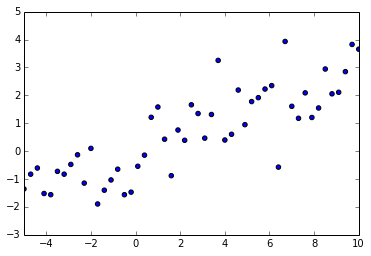

In [45]:

plt.scatter(x,ydata)
plt.xlim([x0,x1])

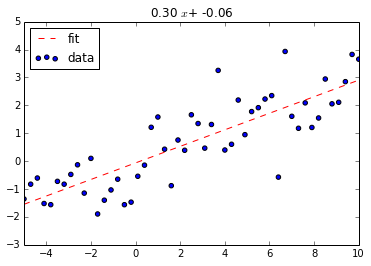

In [48]:
a0,b0 = np.polyfit(x,ydata,1)

yfit = a0 * x + b0
plt.scatter(x,ydata,label='data')
plt.plot(x,yfit,'r--',label='fit')
plt.title('%.2f $x$+ %.2f' % (a0,b0) )
plt.xlim([x0,x1])
plt.legend(loc='upper left')

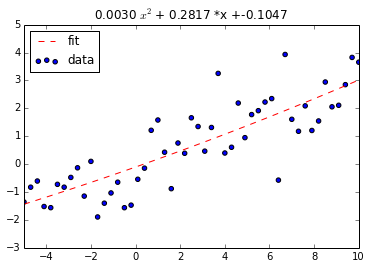

In [51]:
a0,b0,c0 = np.polyfit(x,ydata,2)

yfit = a0 * x*x + b0 *x +c0
plt.scatter(x,ydata,label='data')
plt.plot(x,yfit,'r--',label='fit')
plt.title('%.4f $x^2$+ %.4f *x +%.4f' % (a0,b0,c0) )
plt.xlim([x0,x1])
plt.legend(loc='upper left')

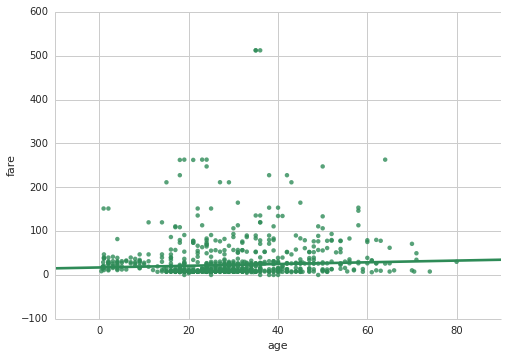

In [34]:
sns.regplot("age", "fare", data=titanic, robust=True, ci=None, color="seagreen")
sns.despine();

### Where did the passengers come from?

The *Titanic* passengers embarked at one of three ports before the voyage.

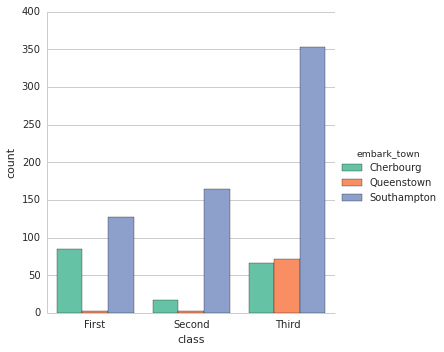

In [35]:
sns.factorplot("class", data=titanic, hue="embark_town", palette="Set2");

### Who was traveling with family members?

We also have some data, although it's not coded very well, about the number of parents/children and the numbe of siblings/spouses on board for each passenger.

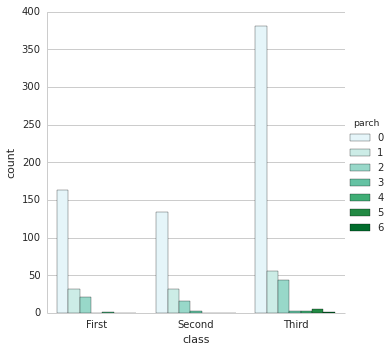

In [36]:
sns.factorplot("class", data=titanic, hue="parch", palette="BuGn");

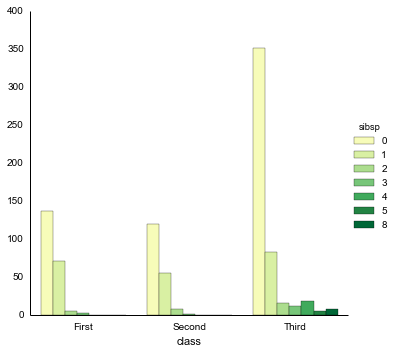

In [32]:
sns.factorplot("class", data=titanic, hue="sibsp", palette="YlGn");

We defined a variable that just measures whether someone was traveling alone, i.e. without family.

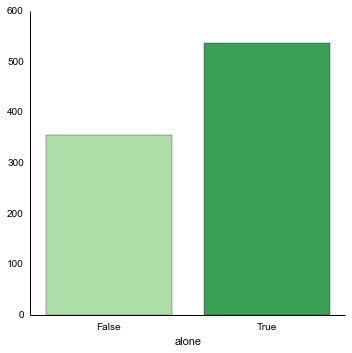

In [33]:
sns.factorplot("alone", data=titanic, palette="Greens");

## What made people survive the sinking?

<div style="width:100%; text-align:center">
<i>Iceberg, dead ahead!</i><br><br>
<img src=Titanic_breaks_in_half.jpg width=500px>
</div>

Now that we have a feel for the characteristics of our sample, let's get down to the main question and ask what factors seem to predict whether our passengers survived. But first, one more count plot just to see how many of our passengers perished in the sinking.

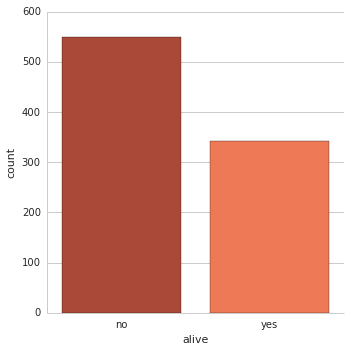

In [37]:
sns.factorplot("alive", data=titanic, palette="OrRd_d");

### What classes had the survivors traveled in?

It's part of popular lore that the third-class (or steerage) passengers fared much more poorly than their wealthier shipmates. Is this borne out in the data?

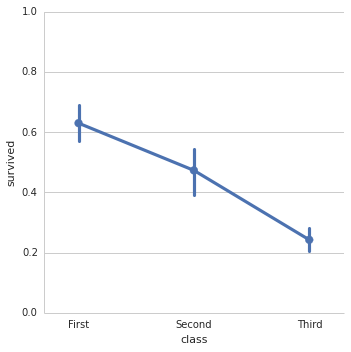

In [38]:
sns.factorplot("class", "survived", data=titanic).set(ylim=(0, 1))

We also of course know that women were given high priority during the evacuation, and we saw above that Third class was disproportionately male. Maybe that's driving the class effect?

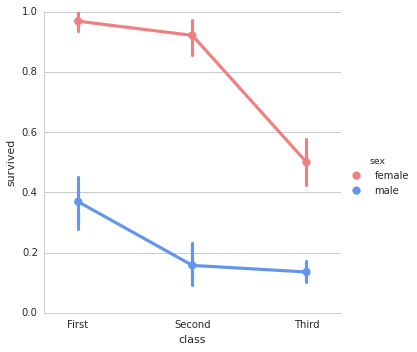

In [39]:
sns.factorplot("class", "survived", data=titanic, hue="sex", palette=pal).set(ylim=(0, 1));

Nope, in general it was not good to be a male *or* to be in steerage.

### What effect did "women and children first" have?

Were they at least successful in evacuating the children?

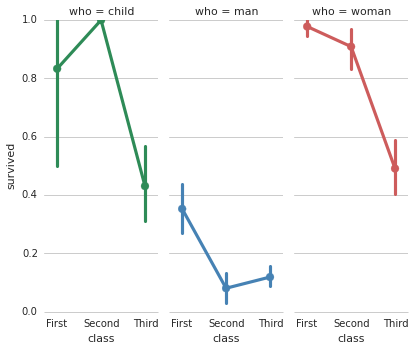

In [40]:
fg = sns.factorplot("class", "survived", data=titanic, hue="who", col="who", palette=pal, aspect=.4)
fg.set(ylim=(0, 1))
fg.despine(left=True)

Pretty good for first and second class (although the precise estimates are unreliable because there weren't that many children traveling in the upper classes. It's actually the case that every second-class child survived, though).

We suspect that the best way to predict survival is to look at whether a passenger was an adult male and what class he or she was in.

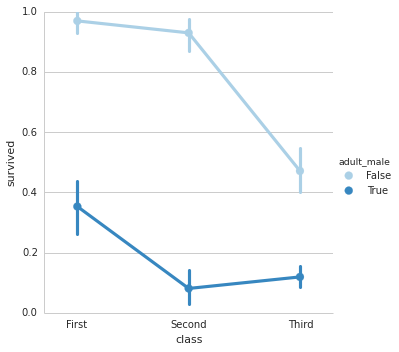

In [41]:
sns.factorplot("class", "survived", data=titanic, hue="adult_male", palette="Blues").set(ylim=(0, 1))

Another way to plot the same data emphasizes the different outcomes for men and other passengers even more dramatically.

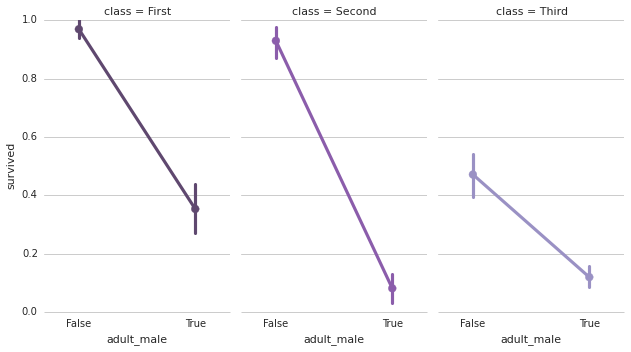

In [61]:
fg = sns.factorplot("adult_male", "survived", data=titanic, col="class", hue="class",
                    aspect=.6, palette="BuPu_d")
fg.set(ylim=(0, 1))
fg.despine(left=True);

### Did age matter in general?

We can also ask whether age as a contiunous variable mattered. We'll draw logistic regression plots, first jittering the survival datapoints to get a sense of the distribution.

- lmplot(): Plot a data and a regression model fit onto a FacetGrid.

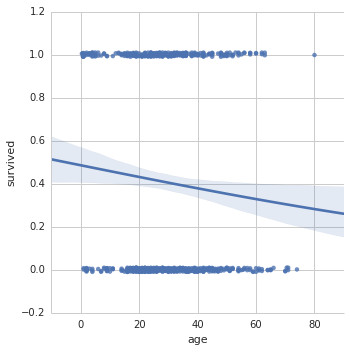

In [52]:
sns.lmplot("age", "survived", titanic, logistic=True, y_jitter=.01);

We can also plot the same data with the survival observations grouped into discrete bins.

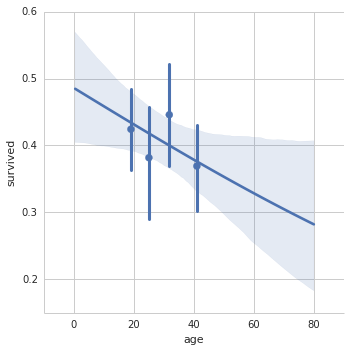

In [44]:
sns.lmplot("age", "survived", titanic, logistic=True, x_bins=4, truncate=True);

### How did age interact with sex and class?

We know that sex is important, though, so we probably want to separate out these predictions for men and women.

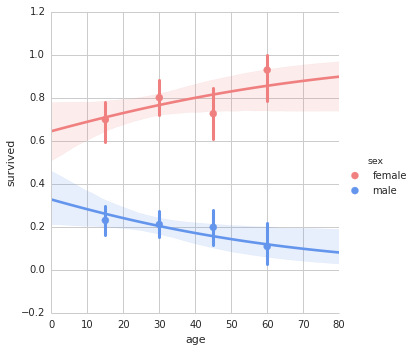

In [45]:
age_bins = [15, 30, 45, 60]
sns.lmplot("age", "survived", titanic, hue="sex",
           palette=pal, x_bins=age_bins, logistic=True).set(xlim=(0, 80));

Class is imporant too, let's see whether it interacts with the age variable as well.

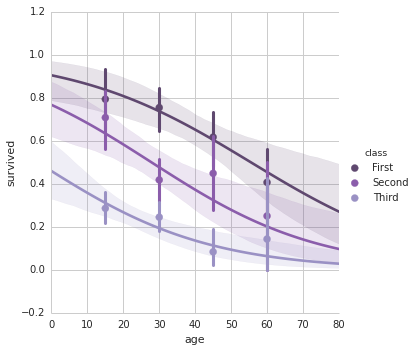

In [46]:
sns.lmplot("age", "survived", titanic, hue="class",
           palette="BuPu_d", x_bins=age_bins, logistic=True).set(xlim=(0, 80));

Because the above plot is rather busy, it might make sense to split the three classes onto separate facets.

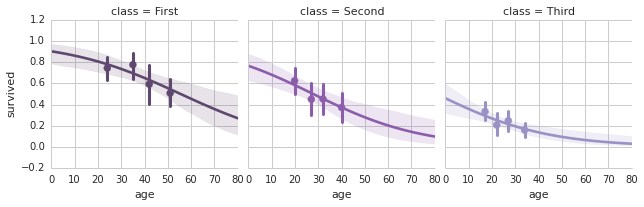

In [47]:
sns.lmplot("age", "survived", titanic, col="class", hue="class",
           palette="BuPu_d", x_bins=4, logistic=True, size=3).set(xlim=(0, 80));

### Did it matter what passengers paid, or where they stayed?

We know that class matters, but we can also use the `fare` variable as a proxy for a contiuous measure of wealth.

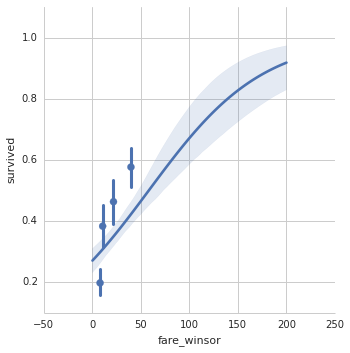

In [71]:
sns.lmplot("fare_winsor", "survived", titanic, x_bins=4, logistic=True, truncate=True);

Perhaps it mattered what deck each passenger's cabin was on?

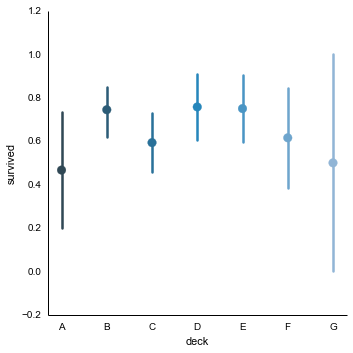

In [46]:
sns.factorplot("deck", "survived", data=titanic, palette="PuBu_d", join=False);

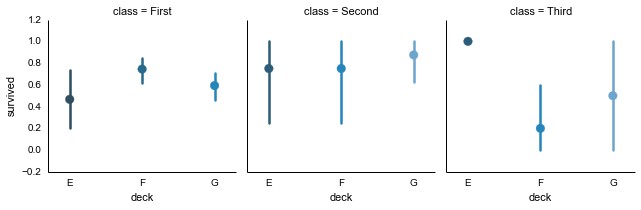

In [47]:
sns.factorplot("deck", "survived", data=titanic, col="class", size=3, palette="PuBu_d", join=False);

### Did family members increase the odds of survival?

Although the way our data on family members was coded, we don't know for sure what sort of companions these passengers had, but it's worth asking how they influenced survival.

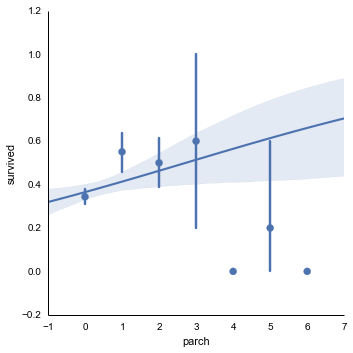

In [48]:
sns.lmplot("parch", "survived", titanic, x_estimator=np.mean, logistic=True);

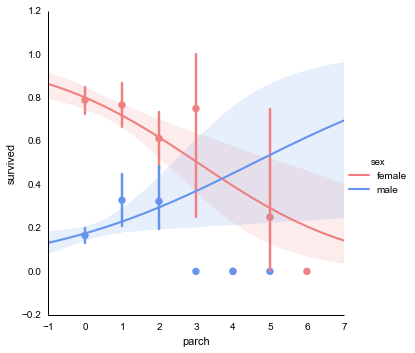

In [49]:
sns.lmplot("parch", "survived", titanic, hue="sex", x_estimator=np.mean, logistic=True, palette=pal);

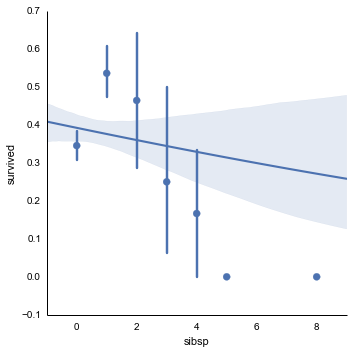

In [50]:
sns.lmplot("sibsp", "survived", titanic, x_estimator=np.mean, logistic=True);

We also have a more interpretable `alone` variable (although it's reasonable to assume that this is going to be confounded with age).

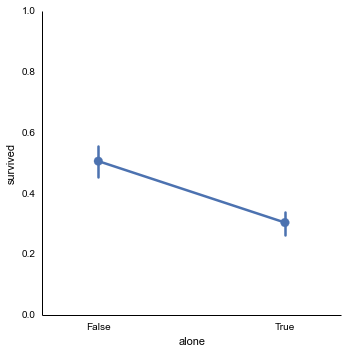

In [51]:
sns.factorplot("alone", "survived", data=titanic).set(ylim=(0, 1));

Did traveling alone have a greater effect depending on what class you were in?

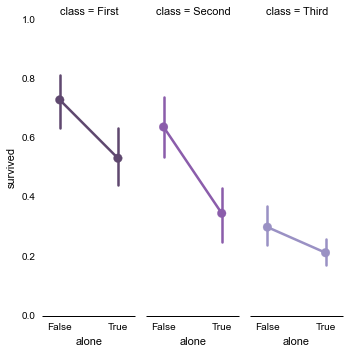

In [52]:
fg = sns.factorplot("alone", "survived", data=titanic, col="class", hue="class",
                    aspect=.33, palette="BuPu_d")
fg.set(ylim=(0, 1))
fg.despine(left=True);

As above, a different presentation of the same data emphasizes different comparisons.

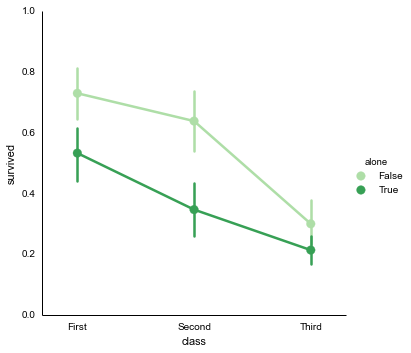

In [53]:
sns.factorplot("class", "survived", data=titanic, hue="alone", palette="Greens").set(ylim=(0, 1));

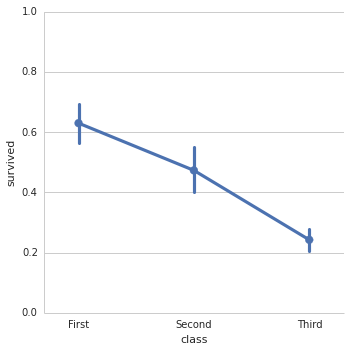

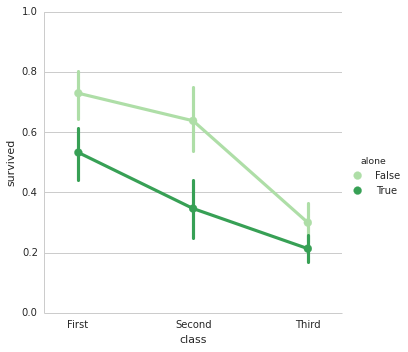

In [59]:
sns.factorplot("class", "survived", data=titanic).set(ylim=(0, 1));
sns.factorplot("class", "survived", data=titanic, hue="alone", palette="Greens").set(ylim=(0, 1));

What about men and women who were traveling alone?

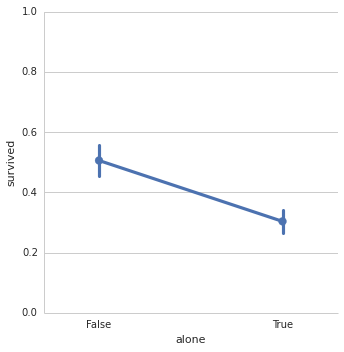

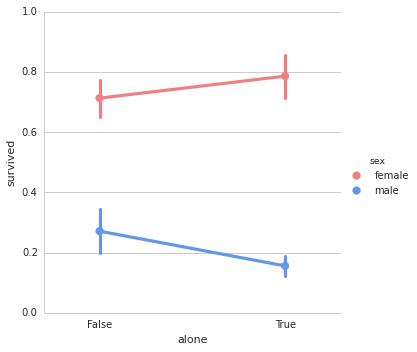

In [61]:
sns.factorplot("alone", "survived", data=titanic).set(ylim=(0, 1));
sns.factorplot("alone", "survived", data=titanic, hue="sex", palette=pal).set(ylim=(0, 1));

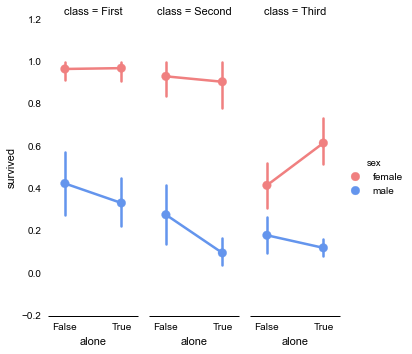

In [55]:
fg = sns.factorplot("alone", "survived", data=titanic, hue="sex",
                    col="class", palette=pal, aspect=.33)
fg.despine(left=True);